<a href="https://colab.research.google.com/github/pridnt/cesar_engdados_icd/blob/master/notebooks/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Coleta de dados



In [0]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/pridnt/cesar_engdados_icd/master/data/AppleStore.csv", encoding = "ISO-8859-1")

In [5]:
# Overview dos dados
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
# Dimensões do datadrame
df.shape

(7197, 17)

## Pré-processamento dos dados

**1.   Definição dos tipos**

In [7]:
df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [0]:
# Ajustando tipos dos dados
df['currency'] = df['currency'].astype('category')
df['cont_rating'] = df['cont_rating'].astype('category')
df['prime_genre'] = df['prime_genre'].astype('category')

In [10]:
df.dtypes

id                     int64
track_name            object
size_bytes             int64
currency            category
price                float64
rating_count_tot       int64
rating_count_ver       int64
user_rating          float64
user_rating_ver      float64
ver                   object
cont_rating         category
prime_genre         category
sup_devices.num        int64
ipadSc_urls.num        int64
lang.num               int64
vpp_lic                int64
dtype: object

In [11]:
df['currency'].cat.categories

Index(['USD'], dtype='object')

In [12]:
df['cont_rating'].cat.categories

Index(['12+', '17+', '4+', '9+'], dtype='object')

In [13]:
df['prime_genre'].cat.categories

Index(['Book', 'Business', 'Catalogs', 'Education', 'Entertainment', 'Finance',
       'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle', 'Medical',
       'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity',
       'Reference', 'Shopping', 'Social Networking', 'Sports', 'Travel',
       'Utilities', 'Weather'],
      dtype='object')

**2.   Tratamento dos dados ausentes**



In [0]:
df = df.drop(columns=['Unnamed: 0'])

In [14]:
df.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

**3.   Normalização e discretização**

**3.1. Normalização**

In [57]:
df['price_norm'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
df['price_norm'].describe()

count    7197.000000
mean        0.005754
std         0.019444
min         0.000000
25%         0.000000
50%         0.000000
75%         0.006634
max         1.000000
Name: price_norm, dtype: float64

In [59]:
df['price_norm'] = ((df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())*2) -1
df['price_norm'].describe()

count    7197.000000
mean       -0.988491
std         0.038888
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -0.986733
max         1.000000
Name: price_norm, dtype: float64

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df['price_norm'] = scaler.fit_transform(df[['price']])
df['price_norm'].describe()

count    7197.000000
mean        0.005754
std         0.019444
min         0.000000
25%         0.000000
50%         0.000000
75%         0.006634
max         1.000000
Name: price_norm, dtype: float64

In [61]:
df['price_norm'] = (df['price'] - df['price'].mean()) / (df['price'].std())
df['price_norm'].describe()

count    7.197000e+03
mean     1.071654e-14
std      1.000000e+00
min     -2.959397e-01
25%     -2.959397e-01
50%     -2.959397e-01
75%      4.522233e-02
max      5.113381e+01
Name: price_norm, dtype: float64

In [62]:
scaler = StandardScaler()
df['price_norm'] = scaler.fit_transform(df[['price']])
df['price_norm'].describe()

count    7.197000e+03
mean     3.457812e-15
std      1.000069e+00
min     -2.959602e-01
25%     -2.959602e-01
50%     -2.959602e-01
75%      4.522548e-02
max      5.113736e+01
Name: price_norm, dtype: float64

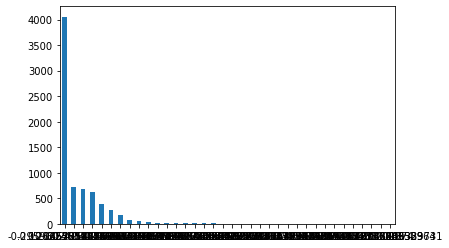

In [63]:
counts = df['price_norm'].value_counts()
counts.plot.bar(rot=0)

**3.2. Discretização**

In [0]:
df.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [0]:
# Discretização não-supervisionada por intervalo (quantidade de agrupamentos pré-definidos)
df['lang.num_dist'] = pd.cut(df['lang.num'],10)

In [56]:
df['user_rating'].value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

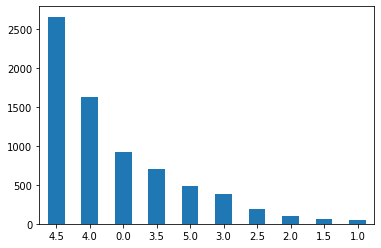

In [55]:
counts = df['lang.user_rating'].value_counts()
counts.plot.bar(rot=0)

In [0]:
# Discretização não-supervisionada por frequência (números de elementos iguais)
df['size_bytes_dist'] = pd.qcut(df['size_bytes'],5)

In [22]:
df['size_bytes_dist'].value_counts()

(219630592.0, 4025969664.0]    1440
(589823.999, 37105049.6]       1440
(120458035.2, 219630592.0]     1439
(75460812.8, 120458035.2]      1439
(37105049.6, 75460812.8]       1439
Name: size_bytes_dist, dtype: int64

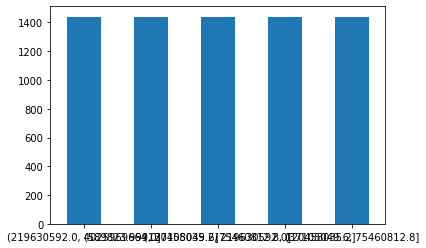

In [23]:
counts = df['size_bytes_dist'].value_counts()
counts.plot.bar(rot=0)

**4.   Limpeza de dados**

**4.1. Univariado**

**4.2. Multivariado**

## Estatísticas descritivas dos dados com visualizações